##### IMPLEMENTATION

In [132]:
#Imported Libraries

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

from collections import Counter
from collections import defaultdict

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

le = LabelEncoder()

### Data Loading and Preprocessing

In [133]:
#Reading Data from csv

train_data_original = pd.read_csv('D:\\COMPETITIONS\\ENIGMA_MiniHackathon\\train_data.csv')
test_data_original = pd.read_csv('D:\\COMPETITIONS\\ENIGMA_MiniHackathon\\test_data.csv')
sample_ = pd.read_csv('D:\\COMPETITIONS\\ENIGMA_MiniHackathon\\sampleSubmissionFile.csv')

In [134]:
train_data_original_copy = train_data_original
test_data_original_copy  = test_data_original

Train and Test Data Information

In [135]:
#Train Data Info
train_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10368 entries, 0 to 10367
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          10368 non-null  int64 
 1   parents     10368 non-null  object
 2   has_nurs    10368 non-null  object
 3   form        10368 non-null  object
 4   children    10368 non-null  object
 5   housing     10368 non-null  object
 6   finance     10368 non-null  object
 7   social      10368 non-null  object
 8   health      10368 non-null  object
 9   app_status  10368 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 810.1+ KB


In [136]:
#Test Data Info
test_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2592 non-null   int64 
 1   parents   2592 non-null   object
 2   has_nurs  2592 non-null   object
 3   form      2592 non-null   object
 4   children  2592 non-null   object
 5   housing   2592 non-null   object
 6   finance   2592 non-null   object
 7   social    2592 non-null   object
 8   health    2592 non-null   object
dtypes: int64(1), object(8)
memory usage: 182.4+ KB


#### Preprocessing : Check for Null Values

In [137]:
print(train_data_original.isna().sum())

ID            0
parents       0
has_nurs      0
form          0
children      0
housing       0
finance       0
social        0
health        0
app_status    0
dtype: int64


In [138]:
print(test_data_original.isna().sum())

ID          0
parents     0
has_nurs    0
form        0
children    0
housing     0
finance     0
social      0
health      0
dtype: int64


##### Conclusion:

Total 9 Columns including Target Variable

Self Explanatory

No Missing Values in Train or Test Data Sets

### Analysing Values Assigned to Columns 

In [139]:
train_data_original_copy = train_data_original_copy.drop(columns=['ID'])
train_data_categorical_columns = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance','social','health']

#### Data Visualization

In [192]:
#Importing Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

Visualization of the behavior of all the columns with the Responce Variable is given below

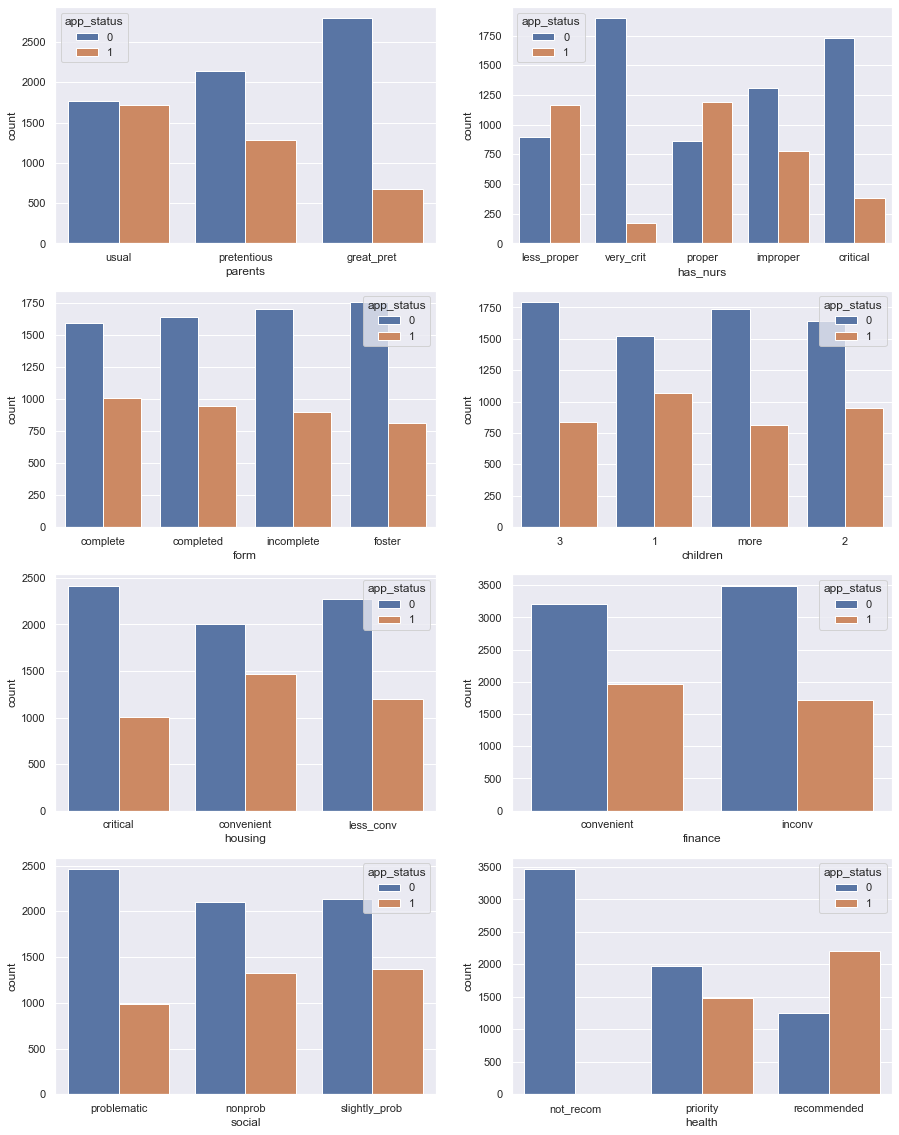

In [201]:
#Plotting all the columns with Responce Variable 'app_status'

fig,axes = plt.subplots(4,2,figsize=(15,20))
sns.set(rc={'figure.figsize':(12,7)})
for idx,cat_col in enumerate(train_data_categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_data_original_copy,hue='app_status',ax=axes[row,col])

# Countplot

Below graphs will show how the counts of the variables are divided

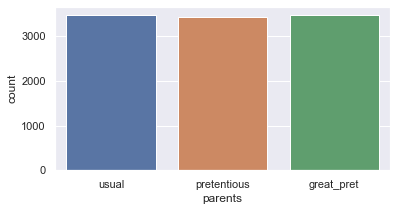

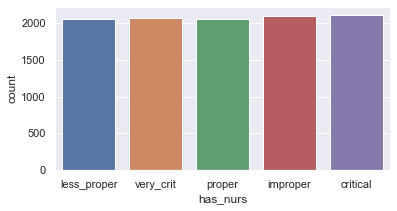

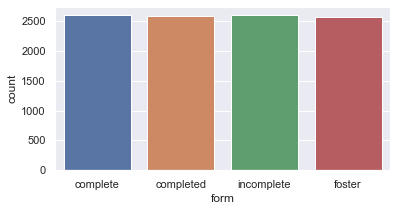

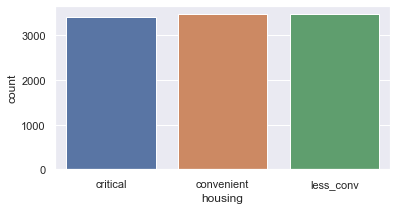

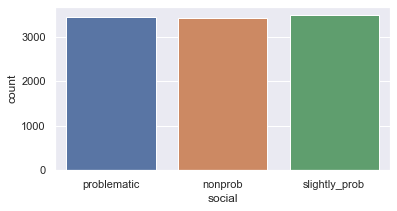

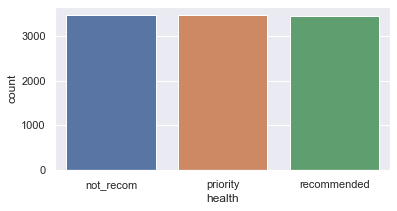

In [204]:
sns.set(rc={'figure.figsize':(12,7)})

#Counts of 'Parents' Varibal, divided into categories usual, pretentious and grate_pret
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['parents'])
plt.show()


#Cound of 'has_nurs' Variable, divided into categories less_proper, very_crit, proper, improper, critical 
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['has_nurs'])
plt.show()


#Counts of 'form' Varibal, divided into categories complete, completed, incomplete, foster
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['form'])
plt.show()


#Counts of 'housing' Varibal, divided into categories critical, convinient, less_conv
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['housing'])
plt.show()


#Counts of 'social' Varibal, divided into categories problematic, nonprob, slightly_prob
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['social'])
plt.show()


#Counts of 'health' Varibal, divided into categories not_recom, priority, recommended
plt.subplots(figsize = (6,3))
sns.countplot(train_data_original_copy['health'])
plt.show()

### Correlation Heatmap 

Exploratory data analysis is done by using Correlation Heatmap to identify which variables are correlated, to what degree, in which direction

In [143]:
#Encoding Categorical Data
for i in train_data_original.columns:
    train_data_original[i]=le.fit_transform(train_data_original[i])

<AxesSubplot:>

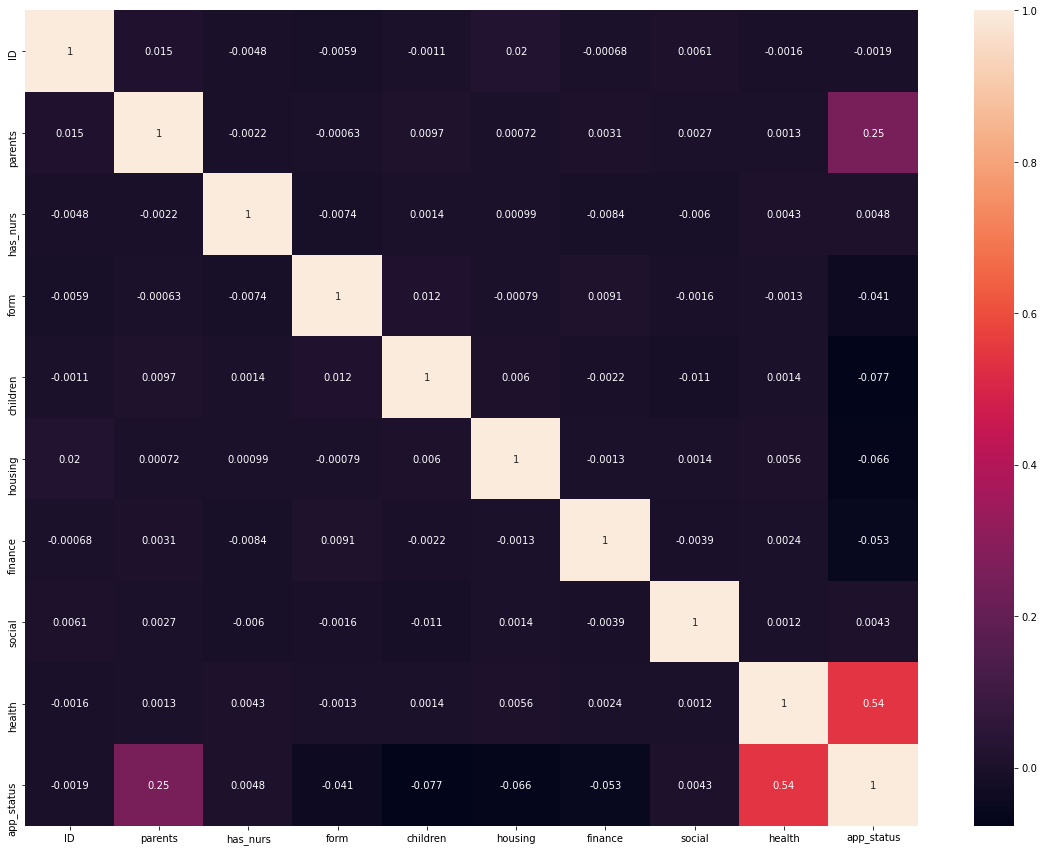

In [144]:
#Plotting Correlation
plt.subplots(figsize = (20,15))
corr = train_data_original.corr()
sns.heatmap(corr,annot=True)

### Model Implementation 

##### Splitting Training Data into Traing and Test 

In [145]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data_original.iloc[:,1:9], train_data_original.iloc[:,9], train_size=0.9)

##### ClassifierModel Implementation : A Model Class to use for different ML Algorithms 

In [146]:
class ClassifierModel(object):
    def __init__(self, clf, params=None):
        self.clf = clf(**params)
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
        return self.clf.predict(x)
    
def trainModel(model, x_train, y_train, x_test, n_folds, seed):
    cv = KFold(n_splits= n_folds, random_state=seed, shuffle=True)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

##### Cross Validation Using Different Classifications 

In [147]:
#randomForest cross validation

from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}

rfc_model = ClassifierModel(clf=RandomForestClassifier, params=rf_params)
rfc_scores = trainModel(rfc_model,X_train, Y_train, X_test, 5, 0)
rfc_scores

array([0.90465988, 0.89228296, 0.89817792, 0.91211147, 0.9244373 ])

In [148]:
# Extra Trees Parameters cross validation

from sklearn.ensemble import ExtraTreesClassifier

et_params = {
    'n_jobs': -1,
    'n_estimators':400,
    'max_depth': 5,
    'min_samples_leaf': 2,
}


etc_model = ClassifierModel(clf=ExtraTreesClassifier, params=et_params)
etc_scores = trainModel(etc_model,X_train, Y_train, X_test, 5, 0) # Random Forest
etc_scores

array([0.90412426, 0.90300107, 0.89710611, 0.88102894, 0.90139335])

In [149]:
# AdaBoost parameters cross validation

from sklearn.ensemble import AdaBoostClassifier

ada_params = {
    'n_estimators': 400,
    'learning_rate' : 0.65
}

ada_model = ClassifierModel(clf=AdaBoostClassifier, params=ada_params)
ada_scores = trainModel(ada_model,X_train, Y_train, X_test, 5, 0) # Random Forest
ada_scores

array([0.936797  , 0.93515541, 0.93086817, 0.92550911, 0.92604502])

In [150]:
# Gradient Boosting parameters cross validation

from sklearn.ensemble import GradientBoostingClassifier

gb_params = {
    'n_estimators': 400,
    'max_depth': 5,
}

gbc_model = ClassifierModel(clf=GradientBoostingClassifier, params=gb_params)
gbc_scores = trainModel(gbc_model,X_train, Y_train, X_test, 5, 0) # Random Forest
gbc_scores

array([1., 1., 1., 1., 1.])




Function for Stack Model Cross Validation

In [151]:
def trainStackModel(x_train, y_train, x_test, n_folds, seed):
    import xgboost as xgb
    cv = KFold(n_splits= n_folds, random_state=seed , shuffle=True)
    gbm = xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, y_train)
    
    scores = cross_val_score(gbm, x_train, y_train, scoring='accuracy', cv=cv)
    return scores

RandomForest Classifier

In [152]:
#Training using RFC
rfc_model.train(X_train,Y_train)

#Predicting using RFC
rfc_train_pred = rfc_model.predict(X_train)

ExtraTree Classifier

In [153]:
#Training using ETC
etc_model.train(X_train,Y_train)

#Predicting using ETC
etc_train_pred = etc_model.predict(X_train) 

AdaBoost Classifier

In [154]:
#Training using AdaBoost
ada_model.train(X_train,Y_train)

#Predicting using AdaBoost
ada_train_pred =  ada_model.predict(X_train)  

GradientBoost Classifier

In [155]:
#Training using GBC
gbc_model.train(X_train,Y_train)

#Predicting using GBC
gbc_train_pred = gbc_model.predict(X_train) 

Stack Model for Prediction

In [156]:
#Getting output from above classifiers as an nd.array 
x_train = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred))

In [157]:
#Input the nd.array for train the Stack Model
trainStackModel(x_train, Y_train, X_test, 5, 0)

[22:06:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:06:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([1., 1., 1., 1., 1.])

Traing the Stack Model using XGBoost

In [158]:
import xgboost as xgb

xgbc=xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(x_train, Y_train)

[22:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [159]:
#prediction for rfc, etc, ada, gbc

rfc_train_pred = rfc_model.predict(X_test) 

etc_train_pred = etc_model.predict(X_test) 

ada_train_pred =  ada_model.predict(X_test)  

gbc_train_pred = gbc_model.predict(X_test) 

#Getting a numpy array from the above predictions
x_test = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred))

#Input the numpy array for xgboot classifier prediction
y_pred5=xgbc.predict(x_test)

### Stack Model Accuracy 

In [160]:
#Stack Model Accuracy
from sklearn.metrics import accuracy_score

Precision, Re-Call, F1-Score, Support and Classification Report are calculated below.

In [161]:
#Accuracy of the Model
print("Accuracy Score   : "+ str(accuracy_score(Y_test,y_pred5)) + "\n")
print("--------------------------------------------------------------------------------------------------")

#Confusion Matrix
print("Confusion Matrix :")
print(metrics.confusion_matrix(Y_test, y_pred5))
print()
print("--------------------------------------------------------------------------------------------------")

#Classification Report
print("Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred5))

Accuracy Score   : 1.0

--------------------------------------------------------------------------------------------------
Confusion Matrix :
[[680   0]
 [  0 357]]

--------------------------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       357

    accuracy                           1.00      1037
   macro avg       1.00      1.00      1.00      1037
weighted avg       1.00      1.00      1.00      1037



##### Confusion Matrix 

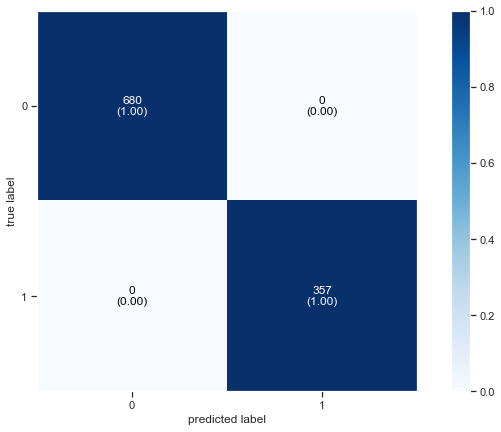

In [194]:
cm = metrics.confusion_matrix(Y_test, y_pred5)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

###### Class wise Error

In [165]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.0
0.0


### XGBoost Classifier : Model Training 

In [166]:
#Individual training XGB
import xgboost as xgb

xgbc1=xgb.XGBClassifier(
     n_estimators= 2000,
     max_depth= 4,
     min_child_weight= 2,
     gamma=0.9,                        
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     scale_pos_weight=1).fit(X_train, Y_train)

[22:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


###### XGBoost Classifier Accuracy Test

In [167]:
#XGBoost Prediction Accuracy 
y_pred6=xgbc1.predict(X_test)
print("XGBoost Accuracy Score       :",accuracy_score(Y_test,y_pred6) , "\n")
print("----------------------------------------------------------------------------------------------------")

#XGBoost Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, y_pred6))
print()
print("----------------------------------------------------------------------------------------------------")

#Classification Report
print("\n\n Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred6))

XGBoost Accuracy Score       : 1.0 

----------------------------------------------------------------------------------------------------
Confusion Matrix:
[[680   0]
 [  0 357]]

----------------------------------------------------------------------------------------------------


 Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       357

    accuracy                           1.00      1037
   macro avg       1.00      1.00      1.00      1037
weighted avg       1.00      1.00      1.00      1037



###### XGBoost Classifier : Confusion Matrix 

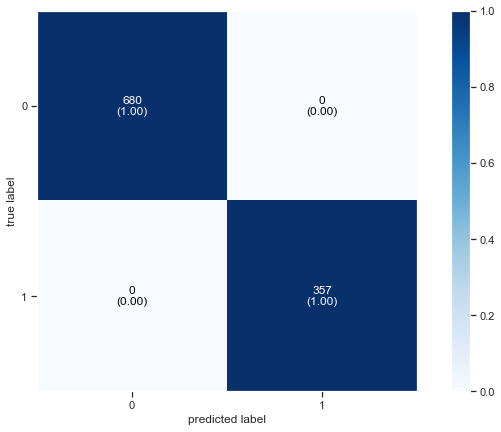

In [195]:
cm = metrics.confusion_matrix(Y_test, y_pred6)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

###### XGBoost Class wise Error 

In [170]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.0
0.0


### RandomForest Classifier

##### RFC Accuracy Test 

In [171]:
#RFC Model Predicting Accuracy
y_pred7 = rfc_model.predict(X_test)
print("Random Forest Accuracy Score :",accuracy_score(Y_test,y_pred7))
print()
print("---------------------------------------------------------------")

#RFC Model Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, y_pred7))
print()
print("---------------------------------------------------------------")

#RFC Model Classification Report
print("Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred7))

Random Forest Accuracy Score : 0.9074252651880425

---------------------------------------------------------------
Confusion Matrix:
[[632  48]
 [ 48 309]]

---------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       680
           1       0.87      0.87      0.87       357

    accuracy                           0.91      1037
   macro avg       0.90      0.90      0.90      1037
weighted avg       0.91      0.91      0.91      1037



###### RFC Confusion Matrix 

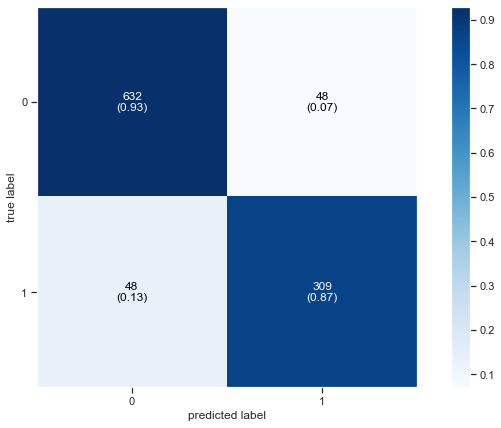

In [196]:
cm = metrics.confusion_matrix(Y_test, y_pred7)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

###### RFC Class wise Error 

In [174]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.07058823529411765
0.13445378151260504


### ExtraTree Classifier 

###### ETC Model Accuracy

In [175]:
#ETC Model Predicting Accuracy
y_pred8 = etc_model.predict(X_test) 
print("ExtraTrees Accuracy Score    :",accuracy_score(Y_test,y_pred8))
print()
print("---------------------------------------------------------------")

#ETC Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, y_pred8))
print()
print("---------------------------------------------------------------")

#ETC Classification Report
print("Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred8))

ExtraTrees Accuracy Score    : 0.8891031822565092

---------------------------------------------------------------
Confusion Matrix:
[[661  19]
 [ 96 261]]

---------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       680
           1       0.93      0.73      0.82       357

    accuracy                           0.89      1037
   macro avg       0.90      0.85      0.87      1037
weighted avg       0.89      0.89      0.89      1037



###### ETC Confusion Matrix

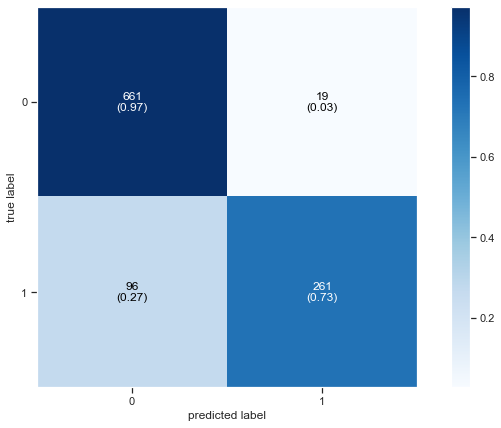

In [197]:
cm = metrics.confusion_matrix(Y_test, y_pred8)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)


###### ETC Class wise Error

In [177]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.027941176470588237
0.2689075630252101


### ADABoost Classifier

###### ADA Model Accuracy

In [178]:
#adaBoost Model Predicting Accuracy
y_pred9 = ada_model.predict(X_test)  
print("AdaBoost Accuracy Score      :",accuracy_score(Y_test,y_pred9))
print()
print("---------------------------------------------------------------")

#AdaBoost Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, y_pred9))
print()
print("---------------------------------------------------------------")

#ADABoost Classification Report
print("Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred9))

AdaBoost Accuracy Score      : 0.9296046287367405

---------------------------------------------------------------
Confusion Matrix:
[[638  42]
 [ 31 326]]

---------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       680
           1       0.89      0.91      0.90       357

    accuracy                           0.93      1037
   macro avg       0.92      0.93      0.92      1037
weighted avg       0.93      0.93      0.93      1037



###### ADABoost Confusion Matrix 

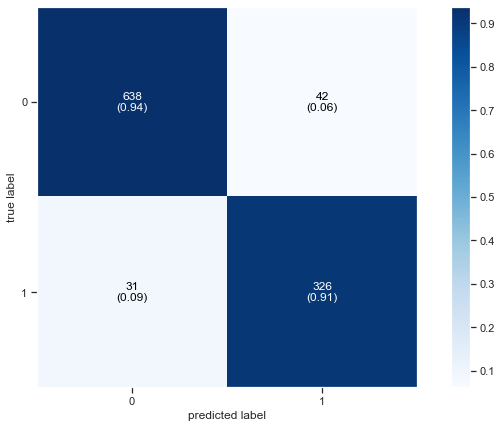

In [198]:
cm = metrics.confusion_matrix(Y_test, y_pred9)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

###### ADABoost Class wise Error 

In [180]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.061764705882352944
0.08683473389355742


### GradientBoost Classifier 

###### GBC Model Accuracy 

In [187]:
# GBC Model Predicting Accuracy
y_pred10 = gbc_model.predict(X_test) 
print("Gradiant Boost Accuracy Score:",accuracy_score(Y_test,y_pred10))
print()
print("---------------------------------------------------------------")

#GBC Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(Y_test, y_pred10))
print()
print("---------------------------------------------------------------")

#GBC Classification Report
print("Classification Report:\n")
print(metrics.classification_report(Y_test, y_pred10))

Gradiant Boost Accuracy Score: 1.0

---------------------------------------------------------------
Confusion Matrix:
[[680   0]
 [  0 357]]

---------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00       357

    accuracy                           1.00      1037
   macro avg       1.00      1.00      1.00      1037
weighted avg       1.00      1.00      1.00      1037



###### GBC Confusion Matrix 

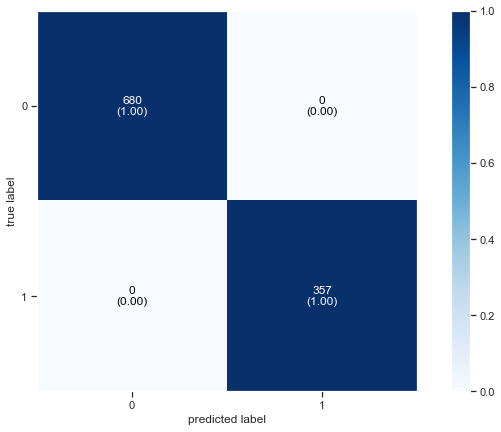

In [199]:
cm = metrics.confusion_matrix(Y_test, y_pred10)
sns.set(rc={'figure.figsize':(12,7)})

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   show_normed = True,
                                   colorbar = True)

###### GBC Class wise Error 

In [189]:
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]
TP = cm[1][1]

error_0 = FP/(TN + FP)
error_1 = FN/(TP + FN)

print(error_0)
print(error_1)

0.0
0.0


### Model Comparison 

In [205]:
#Accuracy classification score
XGBoost=round(accuracy_score(Y_test, y_pred6)*100,3)
RandomForest = round(accuracy_score(Y_test, y_pred7)*100,3)
ExtraTree = round(accuracy_score(Y_test, y_pred8)*100,3)
ADABoost = round(accuracy_score( Y_test, y_pred9)*100,3)
GradientBoost= round(accuracy_score(Y_test, y_pred10)*100,3)

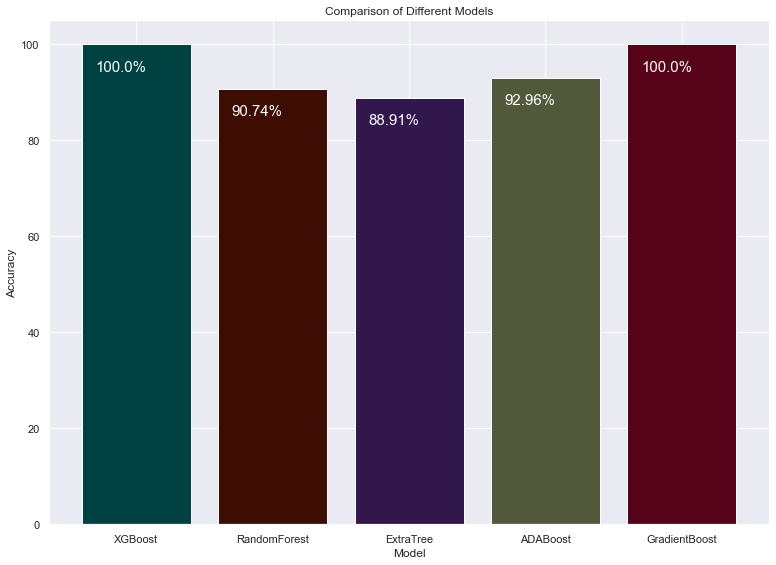

In [207]:
sns.set(rc={'figure.figsize':(10,7)})
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['XGBoost', 'RandomForest', 'ExtraTree', 'ADABoost','GradientBoost']
Accuracy=[XGBoost,RandomForest,ExtraTree,ADABoost,GradientBoost]
#Define colours to bars
ax.bar(Models,Accuracy,color=['#004242','#3d0c02','#32174d','#52593b','#560319']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')
plt.title('Comparison of Different Models');
plt.ylabel('Accuracy');
plt.xlabel('Model');
plt.show();

# -----------------------------------Final Model Implementation-----------------------------------

In [121]:
df_train = pd.read_csv('D:\\COMPETITIONS\\ENIGMA_MiniHackathon\\train_data.csv')
df_train = df_train.drop('ID', axis=1)

df_test = pd.read_csv('D:\\COMPETITIONS\\ENIGMA_MiniHackathon\\test_data.csv')
df_test = df_test.drop('ID', axis=1)
 
df_output = pd.concat([df_train, df_test])
 
df_output
df_output_new = df_output.drop("app_status", axis=1)

Encoding and Splitting DataSet

In [122]:
for i in df_output_new.columns:
    df_output_new[i]=le.fit_transform(df_output_new[i])

X_train=df_output_new[:10368]
X_test=df_output_new[10368:]
Y_train=df_train.iloc[:,8]

Getting the model Predictions for RFC, ETC, ADABoost & GBC 

In [123]:
rfc_train_pred = rfc_model.predict(X_test) 

etc_train_pred = etc_model.predict(X_test) 

ada_train_pred =  ada_model.predict(X_test)  

gbc_train_pred = gbc_model.predict(X_test) 

x_test = np.column_stack(( etc_train_pred, rfc_train_pred, ada_train_pred, gbc_train_pred))

#Outcome of above four classifiers taken into a numpy array and input to the XGBoost Classifier
y_pred5=xgbc.predict(x_test)

In [125]:
import numpy as np
import pandas as pd
 
df = pd.DataFrame(y_pred5, columns = ['app_status'])
print(type(df))
 
df.index += 1
df.head(5)

<class 'pandas.core.frame.DataFrame'>


,app_status
1,1
2,1
3,1
4,1
5,1


In [124]:
df.to_csv("output1.csv")

### Area Under Curve 

AUC = 1